In [78]:
import pandas as pd
import numpy as np
import psycopg2
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [85]:
# Database connection parameters
db_name = 'factihealth'   # Database name
db_user = 'fh_user'  # Username
db_password = 'Facti@874'  # Password
db_host = 'redshift-cluster-factihealth.cuzgotkwtow6.ap-south-1.redshift.amazonaws.com'  # Cluster endpoint
db_port = 5439  # Port
# Connect to the database
try:
    conn = psycopg2.connect(
        dbname=db_name,
        user=db_user,
        password=db_password,
        host=db_host,
        port=db_port
    )
    print("Connected to the database successfully")
    # Create a cursor object
    cur = conn.cursor()
    # Execute a query
    cur.execute("select * from factihealth.mimic.ecg_model_dataset order by subject_id")
    # Fetch the result
    rows = cur.fetchall()

    # Get the column names
    column_names = [desc[0] for desc in cur.description]

    # Create a DataFrame
    master_data = pd.DataFrame(rows, columns=column_names)

    print('Dataframe shape:', master_data.shape)
    # Fetch and print the result
except Exception as e:
    print(f"Database connection failed due to {e}")

Connected to the database successfully
Dataframe shape: (63222, 19)


In [3]:
master_data.to_csv('ecg_raw_dataset.csv',index=False)

In [86]:
master_data.head()

,subject_id,gender,anchor_age,dod,ecgtime,report_2,report_3,bandwidth,filtering,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis,target_variable
0,10001217,F,55,None,2157-11-18,Normal ECG,,0.005-150 Hz,60 Hz notch Baseline filter,895,40,156,204,298,622,67,15,48,Normal ECG
1,10001884,F,68,2131-01-20,2127-07-24,,Abnormal ECG,0.005-150 Hz,60 Hz notch Baseline filter,882,40,154,188,328,626,48,-19,132,Abnormal ECG
2,10001884,F,68,2131-01-20,2131-01-10,,Abnormal ECG,0.005-150 Hz,60 Hz notch Baseline filter,697,40,118,152,288,546,80,-18,119,Abnormal ECG
3,10001884,F,68,2131-01-20,2130-10-12,,Abnormal ECG,0.005-150 Hz,60 Hz notch Baseline filter,882,40,112,152,292,590,-87,-22,126,Abnormal ECG
4,10001884,F,68,2131-01-20,2125-12-01,,Abnormal ECG,0.005-150 Hz,60 Hz notch Baseline filter,923,40,144,180,322,614,71,-13,117,Abnormal ECG


In [87]:
master_data.drop(columns= ['report_2','report_3'],inplace=True)

In [88]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63222 entries, 0 to 63221
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subject_id       63222 non-null  int64 
 1   gender           63222 non-null  object
 2   anchor_age       63222 non-null  int64 
 3   dod              21153 non-null  object
 4   ecgtime          63222 non-null  object
 5   bandwidth        63222 non-null  object
 6   filtering        63222 non-null  object
 7   rr_interval      63222 non-null  int64 
 8   p_onset          63222 non-null  int64 
 9   p_end            63222 non-null  int64 
 10  qrs_onset        63222 non-null  int64 
 11  qrs_end          63222 non-null  int64 
 12  t_end            63222 non-null  int64 
 13  p_axis           63222 non-null  int64 
 14  qrs_axis         63222 non-null  int64 
 15  t_axis           63222 non-null  int64 
 16  target_variable  63222 non-null  object
dtypes: int64(11), object(6)
memory 

In [7]:
master_data.groupby(['target_variable'])['subject_id'].count()

target_variable
Abnormal ECG    28700
Normal ECG      34522
Name: subject_id, dtype: int64

In [8]:
np.shape(master_data)

(63222, 17)

In [9]:
master_data['target_variable'].value_counts()

Normal ECG      34522
Abnormal ECG    28700
Name: target_variable, dtype: int64

In [73]:
(master_data['target_variable'].value_counts()/master_data['target_variable'].count())*100

Normal ECG      54.60441
Abnormal ECG    45.39559
Name: target_variable, dtype: float64

In [12]:
master_data.describe()

,subject_id,anchor_age,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,p_axis,qrs_axis,t_axis
count,6.322200e+04,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000,63222.000000
mean,1.501218e+07,60.722233,807.106735,39.998197,148.636551,202.404005,296.441998,594.437538,47.569485,25.028882,41.946111
std,2.878761e+06,15.459239,152.315109,0.202318,17.059174,30.961334,38.012425,54.423706,25.915806,29.307739,49.521580
min,1.000122e+07,18.000000,295.000000,8.000000,48.000000,70.000000,160.000000,390.000000,-179.000000,-178.000000,-180.000000
25%,1.254433e+07,51.000000,697.000000,40.000000,140.000000,182.000000,270.000000,558.000000,36.000000,2.000000,24.000000
50%,1.499349e+07,61.000000,800.000000,40.000000,150.000000,198.000000,290.000000,590.000000,53.000000,23.000000,44.000000
75%,1.751798e+07,72.000000,909.000000,40.000000,160.000000,216.000000,314.000000,626.000000,64.000000,48.000000,62.000000
max,1.999999e+07,91.000000,2857.000000,40.000000,228.000000,450.000000,544.000000,1024.000000,180.000000,177.000000,180.000000


In [11]:
master_data.isna().sum()

subject_id             0
gender                 0
anchor_age             0
dod                42069
ecgtime                0
bandwidth              0
filtering              0
rr_interval            0
p_onset                0
p_end                  0
qrs_onset              0
qrs_end                0
t_end                  0
p_axis                 0
qrs_axis               0
t_axis                 0
target_variable        0
dtype: int64

<Axes: >

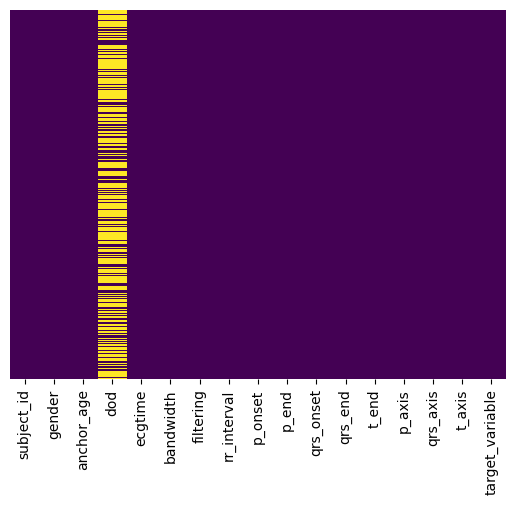

In [13]:
sns.heatmap(master_data.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [74]:
data=master_data.drop(columns=['subject_id'])

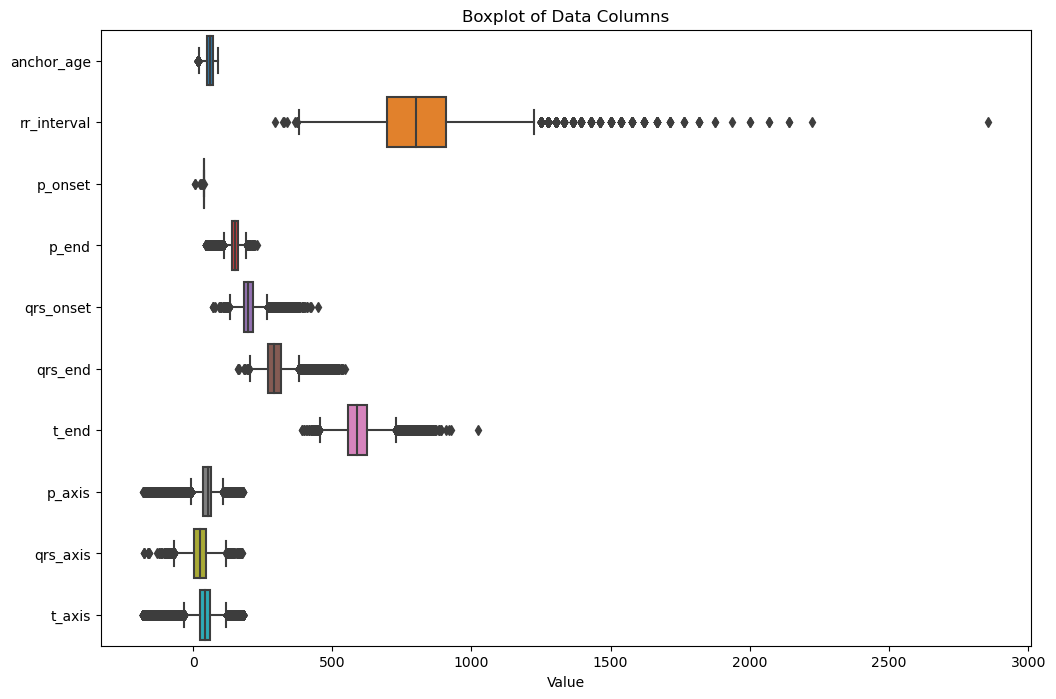

In [16]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Box plot for each column in the DataFrame
sns.boxplot(data=data, orient='h')  # 'orient='h'' for horizontal orientation
plt.title('Boxplot of Data Columns')
plt.xlabel('Value')
plt.show()

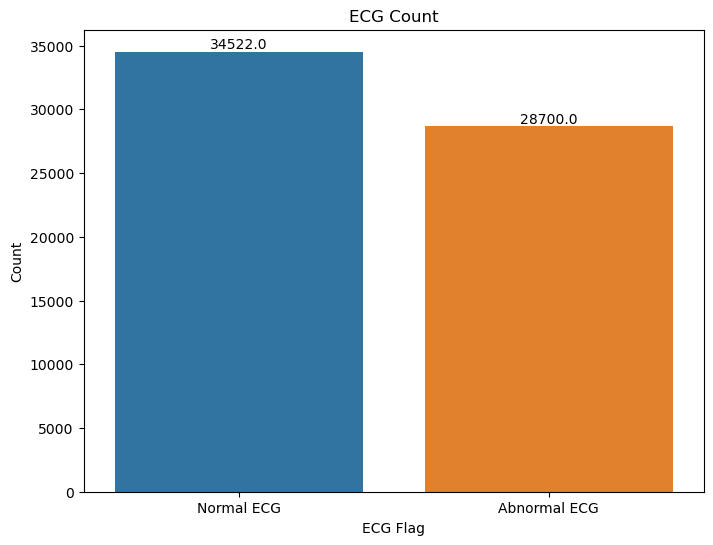

In [18]:
# Assuming 'data_df' is your DataFrame
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x='target_variable', data=data)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('ECG Count')
plt.xlabel('ECG Flag')
plt.ylabel('Count')
plt.show()

C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29896\3436237008.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
C:\Users\krishika.R\AppData\Local\Temp\ipykernel_29896\3436237008.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


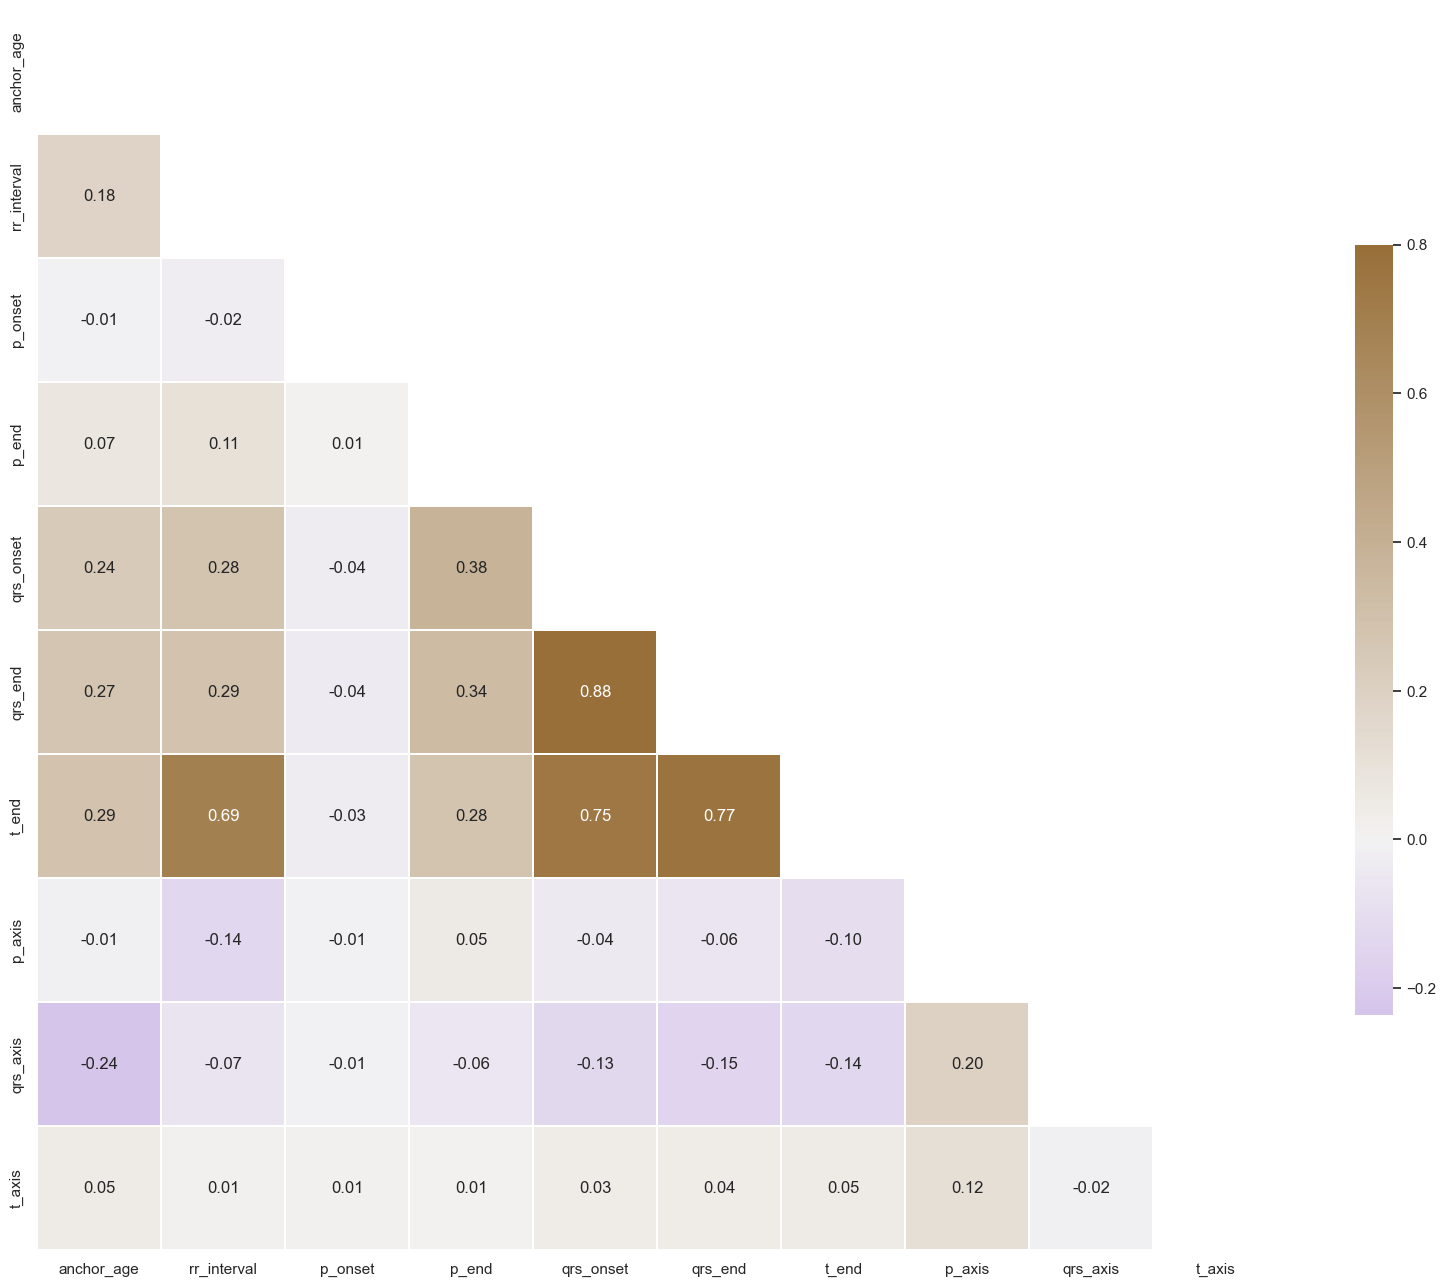

In [19]:
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(1000, 50, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask,vmax =.8, cmap=cmap, center=0,fmt= '.2f',
            square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [28]:
from ydata_profiling import ProfileReport
from pydantic.v1 import BaseSettings

columns_to_exclude = ['dod','ecgtime']
df = selected_columns = master_data.loc[:, master_data.columns.difference(columns_to_exclude)]
profile = ProfileReport(df, title="Profiling Report")

profile.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('Sweetviz_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [91]:
class_mapping = {'Normal ECG': 0, 'Abnormal ECG': 1}
master_data['target_variable'].replace(class_mapping, inplace=True)
# Apply one-hot encoding to 'admission_type' and 'first_careunit'
df_encoded = pd.get_dummies(master_data, columns=['bandwidth','filtering','gender'])
df_encoded.head()

,subject_id,anchor_age,dod,ecgtime,rr_interval,p_onset,p_end,qrs_onset,qrs_end,t_end,...,t_axis,target_variable,bandwidth_0.0005-150 Hz,bandwidth_0.005-150 Hz,bandwidth_0.05-150 Hz,filtering_50 Hz notch Baseline filter,filtering_60 Hz notch Baseline filter,filtering_Baseline filter,gender_F,gender_M
0,10001217,55,None,2157-11-18,895,40,156,204,298,622,...,48,0,0,1,0,0,1,0,1,0
1,10001884,68,2131-01-20,2127-07-24,882,40,154,188,328,626,...,132,1,0,1,0,0,1,0,1,0
2,10001884,68,2131-01-20,2131-01-10,697,40,118,152,288,546,...,119,1,0,1,0,0,1,0,1,0
3,10001884,68,2131-01-20,2130-10-12,882,40,112,152,292,590,...,126,1,0,1,0,0,1,0,1,0
4,10001884,68,2131-01-20,2125-12-01,923,40,144,180,322,614,...,117,1,0,1,0,0,1,0,1,0


In [92]:
columns_to_exclude = ['dod','ecgtime','subject_id']
data = selected_columns = df_encoded.loc[:, df_encoded.columns.difference(columns_to_exclude)]

In [95]:
data=data.sort_index(axis=1)

# Base models:

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [63]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model
logistic_regression.fit(X_train, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.7115856069592724


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.svm import SVC

# Instantiate the model
svm_classifier = SVC(random_state=42)

# Fit the model
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.8124159746935548


In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn_classifier = KNeighborsClassifier()

# Fit the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8409648082245947


## Random Forest

In [51]:
X = data.drop('target_variable', axis=1)
y = data['target_variable']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = rf_classifier.predict(X_test)

[[6698  231]
 [1371 4345]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6929
           1       0.95      0.76      0.84      5716

    accuracy                           0.87     12645
   macro avg       0.89      0.86      0.87     12645
weighted avg       0.88      0.87      0.87     12645

Accuracy: 0.8733096085409253


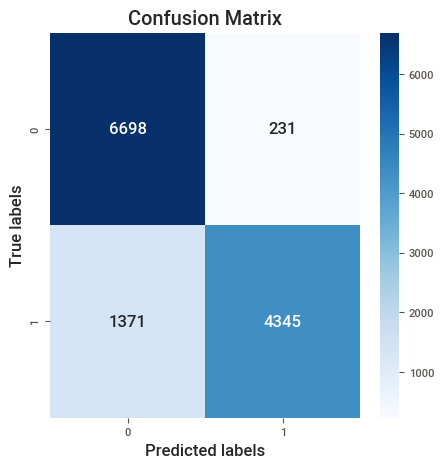

In [55]:
# Evaluating the Algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap from the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Convert the importances into a DataFrame
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

                                  feature  importance
16                                 t_axis    0.262459
15                            rr_interval    0.142780
13                                qrs_end    0.141437
14                              qrs_onset    0.105661
17                                  t_end    0.091694
12                               qrs_axis    0.071618
0                              anchor_age    0.061713
9                                  p_axis    0.058157
10                                  p_end    0.046075
7                                gender_F    0.004566
8                                gender_M    0.004501
3                   bandwidth_0.05-150 Hz    0.003050
2                  bandwidth_0.005-150 Hz    0.002824
5   filtering_60 Hz notch Baseline filter    0.001178
6               filtering_Baseline filter    0.001006
1                 bandwidth_0.0005-150 Hz    0.000944
4   filtering_50 Hz notch Baseline filter    0.000336
11                          

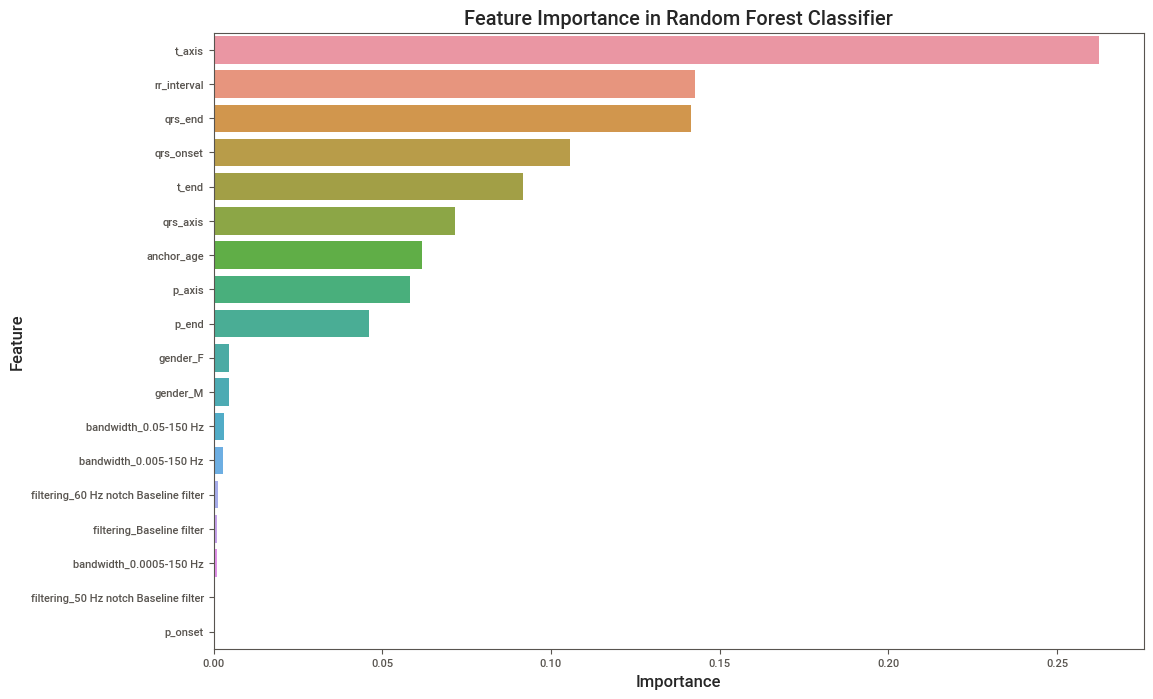

In [57]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model: Random Forest - Hyper Tuned

In [58]:
X = data.drop('target_variable', axis=1)
y = data['target_variable']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base RandomForest model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best accuracy found: ", best_score)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best parameters:", accuracy)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best accuracy found:  0.872175099353461
Accuracy with best parameters: 0.8741004349545275


# Model: XG Boost model

In [59]:
X = data.drop('target_variable', axis=1)
y = data['target_variable']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Fit the classifier to the training set
xgb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8733886911822855


# Model: XG Boost - Hyper Tuned

In [96]:
X = data.drop('target_variable', axis=1)
y = data['target_variable']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,8],
    # Add other parameters here
}

# Create a base model
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best accuracy found:  0.8753386353494716


In [97]:
import pickle
# Save the model to disk
filename = 'icu_patient_ecg_prediction.pkl'  # Change this path if you need to save it elsewhere
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to icu_patient_ecg_prediction.pkl


In [98]:
X_test

,anchor_age,bandwidth_0.0005-150 Hz,bandwidth_0.005-150 Hz,bandwidth_0.05-150 Hz,filtering_50 Hz notch Baseline filter,filtering_60 Hz notch Baseline filter,filtering_Baseline filter,gender_F,gender_M,p_axis,p_end,p_onset,qrs_axis,qrs_end,qrs_onset,rr_interval,t_axis,t_end
28352,68,0,1,0,0,1,0,1,0,37,142,40,-3,264,196,740,81,556
7822,62,0,1,0,0,1,0,0,1,39,150,40,38,356,218,582,-50,592
32595,77,0,1,0,0,1,0,1,0,71,188,40,29,350,270,740,56,630
52674,55,0,1,0,0,1,0,0,1,50,170,40,10,306,192,638,21,572
52631,61,0,1,0,0,1,0,1,0,34,150,40,0,322,180,731,33,598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,33,0,1,0,0,1,0,1,0,59,138,40,28,260,168,869,37,576
35890,71,0,1,0,0,1,0,1,0,56,128,40,-18,344,198,638,133,590
36503,58,0,1,0,0,1,0,1,0,55,170,40,-9,298,202,612,58,546
55553,77,0,1,0,0,1,0,1,0,30,118,40,21,308,236,895,-16,672


In [67]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
params = {
    'n_estimators': 300,
    'learning_rate': 0.1,
    'max_depth': 4
}

# Assume xgb_model is your trained model
xgb_model = xgb.train(params, dtrain, 180)

# Save the model
model_file_path = "xgboost_model_v2_2_file.model"
xgb_model.save_model(model_file_path)

C:\Users\krishika.R\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\krishika.R\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [14:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [61]:
best_model = grid_search.best_estimator_

# Predict the labels on the test set
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6725  204]
 [1379 4337]]
